## Implementation Of Surgical Fine-Tunining

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt

### Using CIFAR-10 Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values to be between 0 and 1
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 282s 2us/step


In [3]:
def plot_training_history(history, title):
    for i in history:
        plt.plot(i.history['accuracy'], label='Training Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epoch')
    plt.legend(["CNN-Scratch", "InceptionV3", "Top-Trainable", "Middle-Trainable", "Last-Trainable"], loc="lower right")
    plt.show()
    
def plot_validation_history(history, title):
    for i in history:
        plt.plot(i.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epoch')
    plt.legend(["CNN-Scratch", "InceptionV3", "Top-Trainable", "Middle-Trainable", "Last-Trainable"], loc="lower right")
    plt.show()

def plot_train_loss_history(history, title):
    for i in history:
        plt.plot(i.history['loss'], label='Training Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epoch')
    plt.legend(["CNN-Scratch", "InceptionV3", "Top-Trainable", "Middle-Trainable", "Last-Trainable"], loc="upper right")
    plt.show()
    
def plot_val_loss_history(history, title):
    for i in history:
        plt.plot(i.history['val_loss'], label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epoch')
    plt.legend(["CNN-Scratch", "InceptionV3", "Top-Trainable", "Middle-Trainable", "Last-Trainable"], loc="upper right")
    plt.show()

In [4]:
history = []

### 1. CNN Model

In [5]:
# Build a basic CNN model
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.append(history1)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5062 - accuracy: 0.4517 - val_loss: 1.2285 - val_accuracy: 0.5629
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1508 - accuracy: 0.5924 - val_loss: 1.0769 - val_accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0066 - accuracy: 0.6462 - val_loss: 0.9771 - val_accuracy: 0.6590
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9125 - accuracy: 0.6817 - val_loss: 0.9705 - val_accuracy: 0.6614
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8435 - accuracy: 0.7037 - val_loss: 0.9063 - val_accuracy: 0.6862
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7873 - accuracy: 0.7251 - val_loss: 0.8829 - val_accuracy: 0.6940
Epoch 7/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7379 - accuracy: 0.7427 - val_loss: 0.8453 -

### Building Inception Module

In [7]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Build the Inception model on top of the pre-trained base model
model2 = models.Sequential()
model2.add(layers.UpSampling2D((7, 7)))  # Upsample to match InceptionV3 input shape
model2.add(base_model)
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
# model_inception.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.append(history2)

Epoch 1/10
1563/1563 [==============================] - 1194s 761ms/step - loss: 0.5857 - accuracy: 0.8007 - val_loss: 0.4949 - val_accuracy: 0.8295
Epoch 2/10
1563/1563 [==============================] - 1151s 736ms/step - loss: 0.4529 - accuracy: 0.8447 - val_loss: 0.5039 - val_accuracy: 0.8331
Epoch 3/10
1563/1563 [==============================] - 1232s 788ms/step - loss: 0.4060 - accuracy: 0.8596 - val_loss: 0.4730 - val_accuracy: 0.8441
Epoch 4/10
1563/1563 [==============================] - 1072s 686ms/step - loss: 0.3702 - accuracy: 0.8706 - val_loss: 0.4729 - val_accuracy: 0.8416
Epoch 5/10
1563/1563 [==============================] - 1107s 708ms/step - loss: 0.3379 - accuracy: 0.8807 - val_loss: 0.4657 - val_accuracy: 0.8491
Epoch 6/10
1563/1563 [==============================] - 1124s 719ms/step - loss: 0.3067 - accuracy: 0.8902 - val_loss: 0.4973 - val_accuracy: 0.8435
Epoch 7/10
1563/1563 [==============================] - 1122s 718ms/step - loss: 0.2838 - accuracy: 0.8996

In [7]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_97 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_97[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizati

### 2. Inception Module (Top-Trainable)

In [8]:
for layer in base_model.layers[51:]:    # Freezes all layers except the top 50, allowing training only within the initial 50 layers.
    layer.trainable = False 
    
# Build the Inception model on top of the pre-trained base model
model3 = models.Sequential()
model3.add(layers.UpSampling2D((7, 7)))  # Upsample to match InceptionV3 input shape
model3.add(base_model)
model3.add(layers.GlobalAveragePooling2D())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
# model_inception.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.append(history3)

Epoch 1/10
1563/1563 [==============================] - 204s 123ms/step - loss: 0.5066 - accuracy: 0.8321 - val_loss: 0.5857 - val_accuracy: 0.8127
Epoch 2/10
1563/1563 [==============================] - 190s 121ms/step - loss: 0.3044 - accuracy: 0.8992 - val_loss: 0.3630 - val_accuracy: 0.8786
Epoch 3/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.2612 - accuracy: 0.9132 - val_loss: 0.3024 - val_accuracy: 0.9015
Epoch 4/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.2350 - accuracy: 0.9215 - val_loss: 0.3024 - val_accuracy: 0.8997
Epoch 5/10
1563/1563 [==============================] - 190s 122ms/step - loss: 0.2102 - accuracy: 0.9292 - val_loss: 0.3194 - val_accuracy: 0.9013
Epoch 6/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.1896 - accuracy: 0.9361 - val_loss: 0.3027 - val_accuracy: 0.9040
Epoch 7/10
1563/1563 [==============================] - 190s 122ms/step - loss: 0.1718 - accuracy: 0.9419 - val_

### 3. Inception Module (Middle-Trainable)

In [9]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Loads InceptionV3 without the top classification layers

for layer in (base_model.layers[:50] + base_model.layers[-50:]):    # Freezes layers 0 to 49 and the last 50 layers, allowing training only in the middle section.
    layer.trainable = False

# Build the Inception model on top of the pre-trained base model
model4 = models.Sequential()
model4.add(layers.UpSampling2D((7, 7)))  # Upsample to match InceptionV3 input shape
model4.add(base_model)
model4.add(layers.GlobalAveragePooling2D())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(128, activation='relu'))
# model_inception.add(layers.Dropout(0.5))
model4.add(layers.Dense(10, activation='softmax'))

# Compile the model
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.append(history4)

Epoch 1/10
1563/1563 [==============================] - 198s 110ms/step - loss: 0.6721 - accuracy: 0.7775 - val_loss: 0.7397 - val_accuracy: 0.7674
Epoch 2/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.3761 - accuracy: 0.8748 - val_loss: 0.4027 - val_accuracy: 0.8673
Epoch 3/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.2809 - accuracy: 0.9051 - val_loss: 0.4164 - val_accuracy: 0.8692
Epoch 4/10
1563/1563 [==============================] - 171s 109ms/step - loss: 0.2223 - accuracy: 0.9254 - val_loss: 0.3594 - val_accuracy: 0.8869
Epoch 5/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.1733 - accuracy: 0.9413 - val_loss: 0.5295 - val_accuracy: 0.8485
Epoch 6/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.1405 - accuracy: 0.9513 - val_loss: 0.4038 - val_accuracy: 0.8843
Epoch 7/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.1136 - accuracy: 0.9611 - val_

### 4. Inception Module (Bottom-Trainable)

In [10]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-50]:  # Freezes all layers except the last 50, allowing training only within those final layers.
    layer.trainable = False

# Build the Inception model on top of the pre-trained base model
model5 = models.Sequential()
model5.add(layers.UpSampling2D((7, 7)))  # Upsample to match InceptionV3 input shape
model5.add(base_model)
model5.add(layers.GlobalAveragePooling2D())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(128, activation='relu'))
# model_inception.add(layers.Dropout(0.5))
model5.add(layers.Dense(10, activation='softmax'))

# Compile the model
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history5 = model5.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.append(history5)

Epoch 1/10
1563/1563 [==============================] - 98s 56ms/step - loss: 0.4376 - accuracy: 0.8549 - val_loss: 0.3078 - val_accuracy: 0.8969
Epoch 2/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.2556 - accuracy: 0.9153 - val_loss: 0.3166 - val_accuracy: 0.8967
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.1786 - accuracy: 0.9399 - val_loss: 0.3392 - val_accuracy: 0.8959
Epoch 4/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.1234 - accuracy: 0.9586 - val_loss: 0.3578 - val_accuracy: 0.9007
Epoch 5/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.0929 - accuracy: 0.9687 - val_loss: 0.3945 - val_accuracy: 0.9000
Epoch 6/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.0709 - accuracy: 0.9759 - val_loss: 0.3953 - val_accuracy: 0.9046
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.3886 -

### Performance-Metrics Comparison

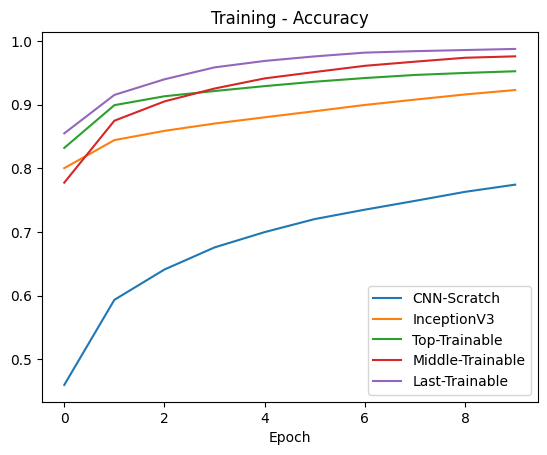

In [ ]:
# Training Accuracy
plot_training_history(history, 'Training')

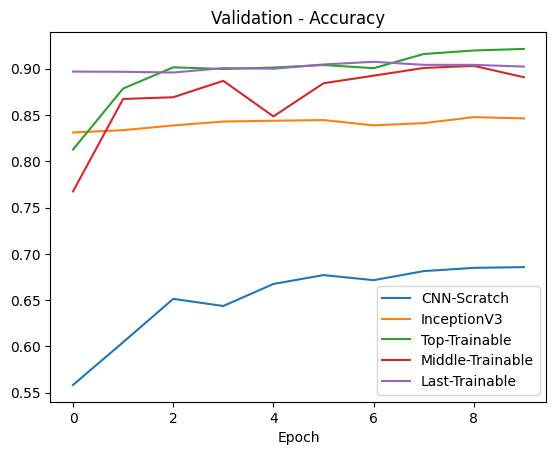

In [12]:
plot_validation_history(history, 'Validation')

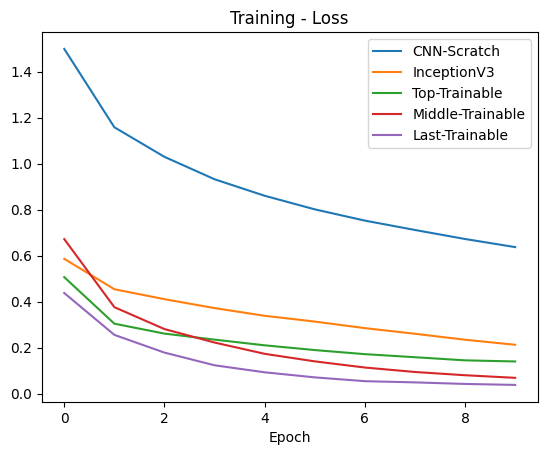

In [13]:
plot_train_loss_history(history, 'Training')

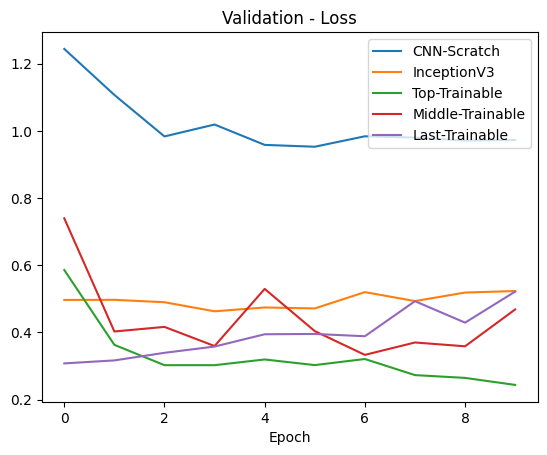

In [14]:
plot_val_loss_history(history, 'Validation')